## 1. **Loading the Dataset**

**1.1 Import python packages**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

**1.2 Display the first few rows to understand the data structure.**

In [4]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 2. **Exploratory Data Analysis (EDA)**

**2.1 Check for missing values**

In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**2.2 Data types and unique values**

In [8]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [19]:
for col in df.columns:
    print(f'{col} has {df[col].nunique()} unique values')

RowNumber has 10000 unique value
CustomerId has 10000 unique value
Surname has 2932 unique value
CreditScore has 460 unique value
Geography has 3 unique value
Gender has 2 unique value
Age has 70 unique value
Tenure has 11 unique value
Balance has 6382 unique value
NumOfProducts has 4 unique value
HasCrCard has 2 unique value
IsActiveMember has 2 unique value
EstimatedSalary has 9999 unique value
Exited has 2 unique value


**2.3 Summary statistics**

In [20]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


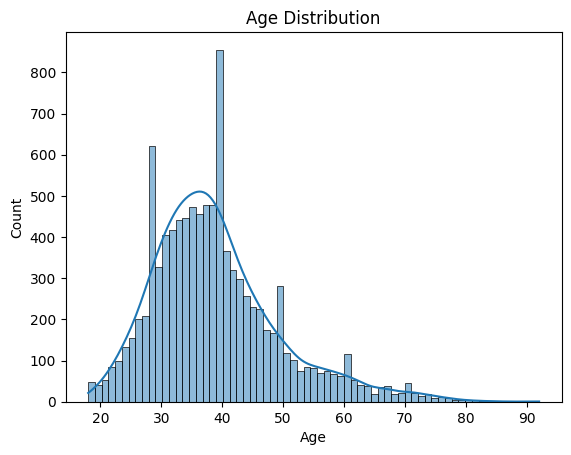

In [23]:
sns.histplot(df['Age'], kde = True)
plt.title('Age Distribution')
plt.show()

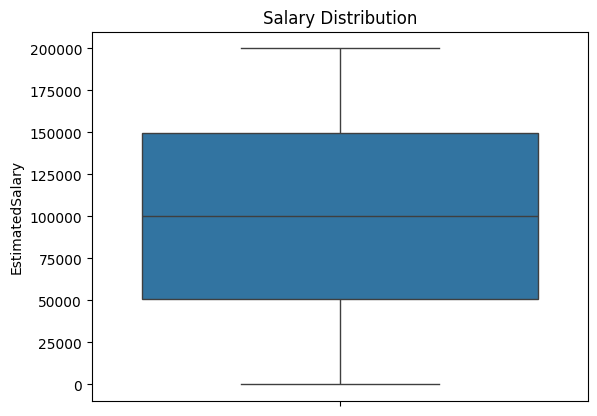

In [25]:
sns.boxplot(df['EstimatedSalary'])
plt.title('Salary Distribution')
plt.show()

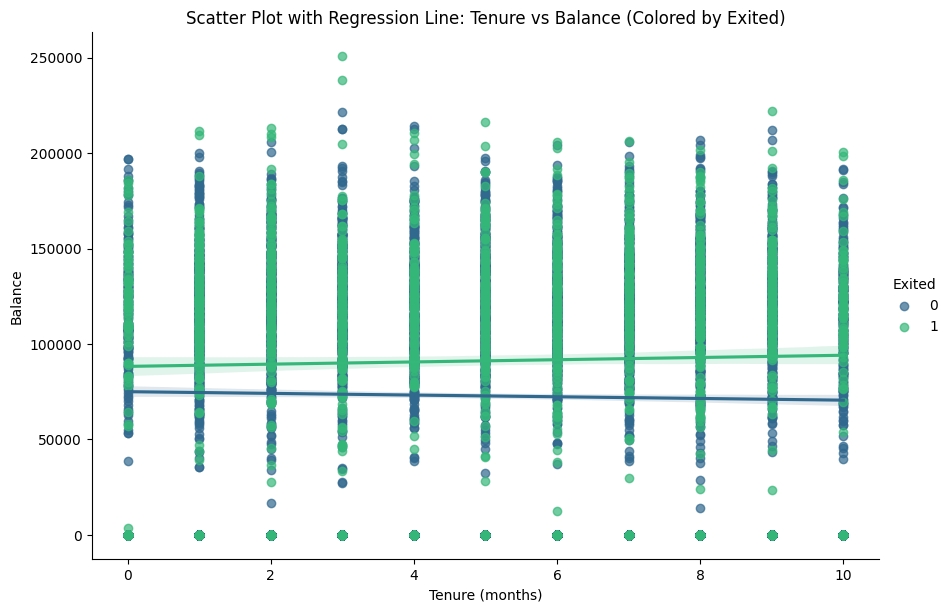

In [34]:
lm= sns.lmplot(
    x='Tenure', 
    y='Balance', 
    hue='Exited', 
    data=df, 
    palette='viridis', 
    height=6, 
    aspect=1.5,
    scatter_kws={'alpha': 0.7}
)

# Add labels and title
lm.set(
    title="Scatter Plot with Regression Line: Tenure vs Balance (Colored by Exited)",
    xlabel="Tenure (months)",
    ylabel="Balance"
)

# Show the plot
plt.show()

In [28]:
# df.head()
grouped_summary = df.groupby('Gender')['EstimatedSalary'].describe()
print(grouped_summary)

         count           mean           std    min        25%        50%  \
Gender                                                                     
Female  4543.0  100601.541382  57371.034092  91.75  51224.485  101905.34   
Male    5457.0   99664.576931  57628.130354  11.58  50906.650   98060.51   

              75%        max  
Gender                        
Female  148963.12  199992.48  
Male    149503.54  199953.33  


**2.4 Class balance**

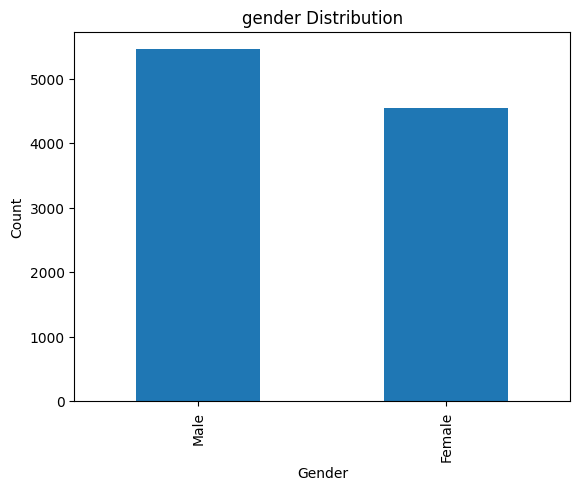

In [44]:
df['Gender'].value_counts().plot(kind='bar')
plt.title("gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

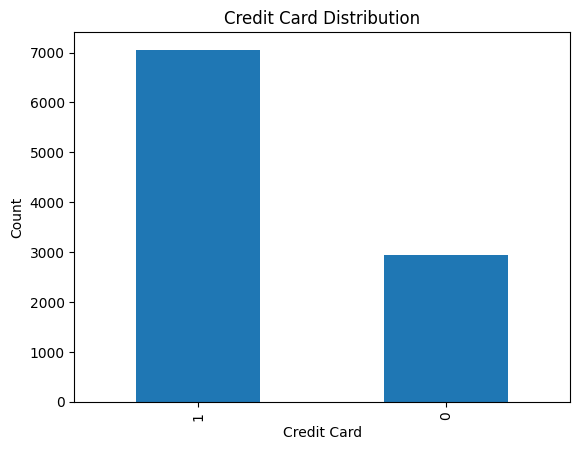

In [46]:
df['HasCrCard'].value_counts().plot(kind='bar')
plt.title("Credit Card Distribution")
plt.xlabel("Credit Card")
plt.ylabel("Count")
plt.show()


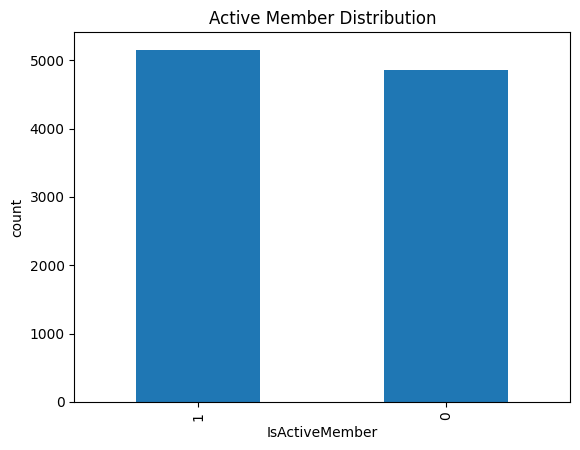

In [48]:
df.head()
df['IsActiveMember'].value_counts().plot(kind = 'bar')
plt.title('Active Member Distribution')
plt.xlabel('IsActiveMember')
plt.ylabel('count')
plt.show()


## 3. **Data Visualization**

**3.1 Churn Distribution**

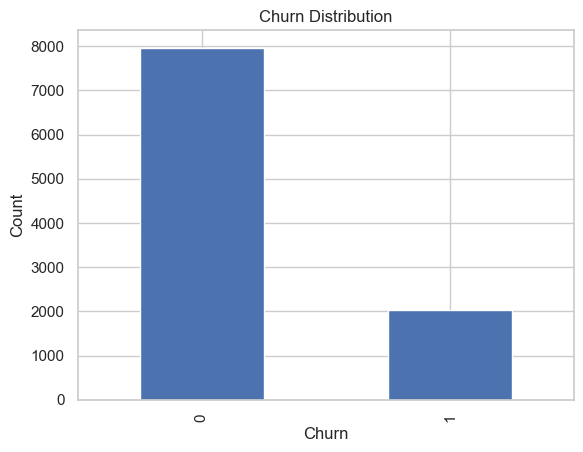

In [58]:
df['Exited'].value_counts().plot(kind='bar')
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")

plt.show()

**3.2 Demographics Analysis**:

- Age distribution of churned vs. non-churned customers.

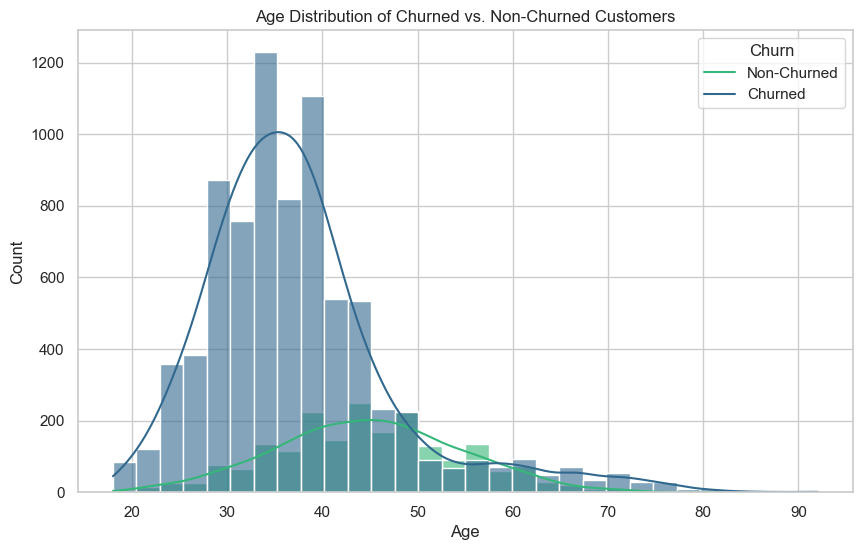

In [51]:
# Set the style
sns.set(style="whitegrid")

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Exited', kde=True, palette='viridis', bins=30, alpha=0.6)

# Add labels and title
plt.title("Age Distribution of Churned vs. Non-Churned Customers")
plt.xlabel("Age")
plt.ylabel("Count")

# Show the plot
plt.legend(title='Churn', labels=['Non-Churned', 'Churned'])
plt.show()

- Gender distribution among churned customers.

/var/folders/pz/x922ffzx1z77z1strd8qk2qh0000gn/T/ipykernel_24389/3466407958.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = churn_rate, x= 'Gender', y ='Exited', palette = 'viridis')


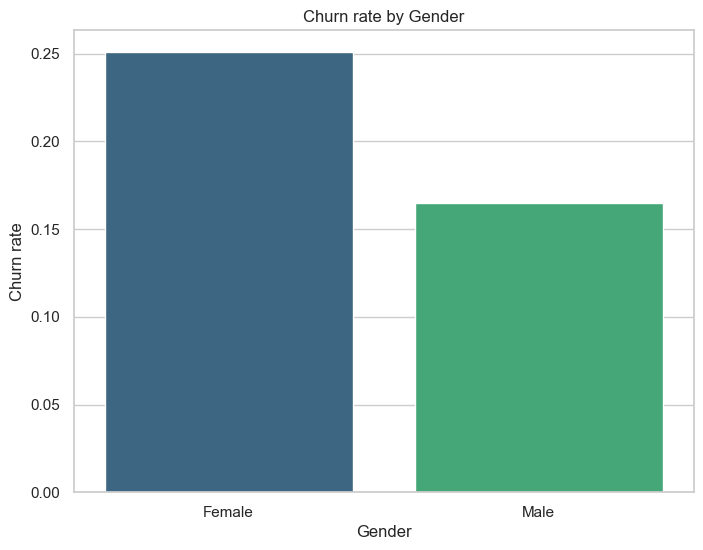

In [56]:
# Set the style
sns.set(style="whitegrid")

# churn rate
churn_rate = df.groupby('Gender')['Exited'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data = churn_rate, x= 'Gender', y ='Exited', palette = 'viridis')

# Add labels and title
plt.title("Churn rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Churn rate")

# Show the plot
plt.show()

- Churn rate per geography.

/var/folders/pz/x922ffzx1z77z1strd8qk2qh0000gn/T/ipykernel_24389/3033254009.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = churn_rate, x= 'Geography', y ='Exited', palette = 'viridis')


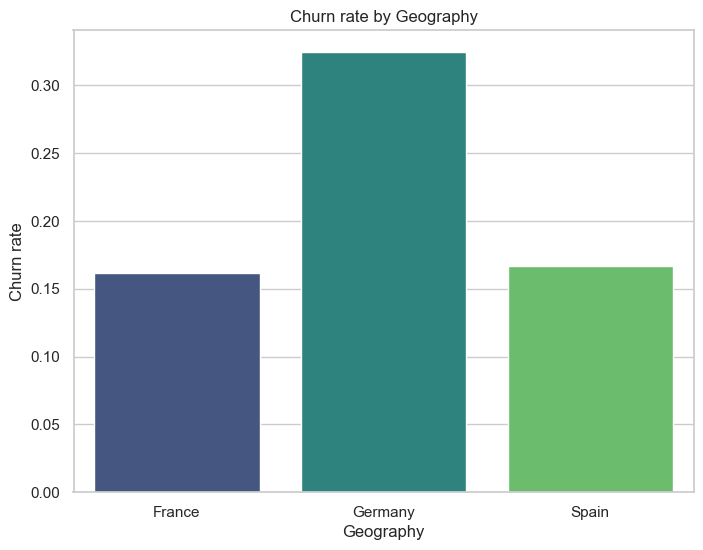

In [59]:
# Set the style
sns.set(style="whitegrid")

# churn rate
churn_rate = df.groupby('Geography')['Exited'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data = churn_rate, x= 'Geography', y ='Exited', palette = 'viridis')

# Add labels and title
plt.title("Churn rate by Geography")
plt.xlabel("Geography")
plt.ylabel("Churn rate")

# Show the plot
plt.show()

**3.3 Financial Insights**:

- Credit score distribution for churned vs. non-churned customers.

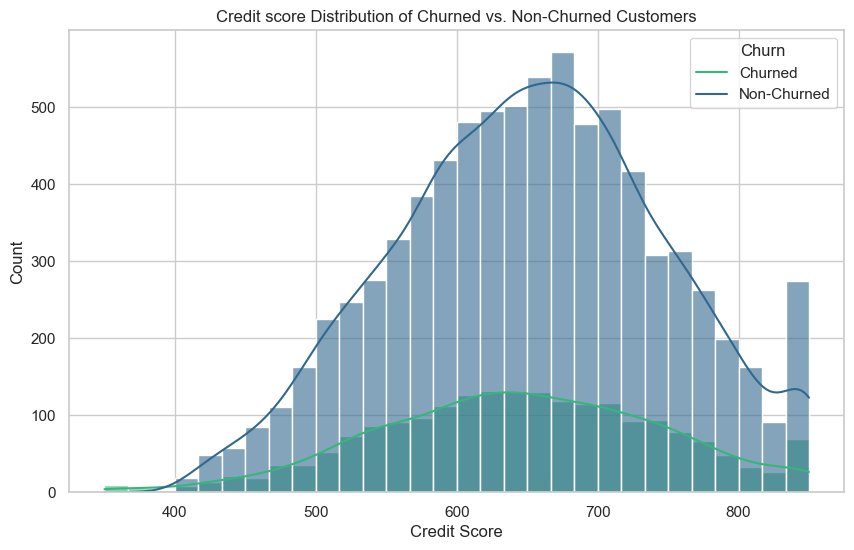

In [66]:
# Set the style
sns.set(style="whitegrid")

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='CreditScore', hue='Exited', kde=True, palette='viridis', bins=30, alpha=0.6)

# Add labels and title
plt.title("Credit score Distribution of Churned vs. Non-Churned Customers")
plt.xlabel("Credit Score")
plt.ylabel("Count")

# Show the plot
plt.legend(title='Churn', labels=['Churned', 'Non-Churned'])
plt.show()

- Balance and estimated salary comparison.

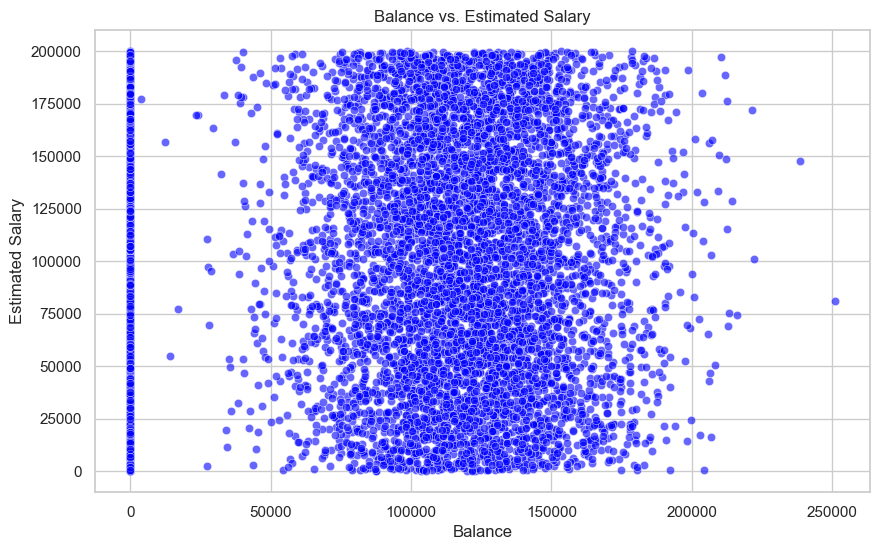

In [69]:
# Set the style
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Balance', y='EstimatedSalary', alpha=0.6, color='blue')

# Add labels and title
plt.title("Balance vs. Estimated Salary")
plt.xlabel("Balance")
plt.ylabel("Estimated Salary")

# Show the plot
plt.show()

- Churn rate by number of products.

/var/folders/pz/x922ffzx1z77z1strd8qk2qh0000gn/T/ipykernel_24389/606706927.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = churn_rate, x= 'NumOfProducts', y ='Exited', palette = 'viridis')


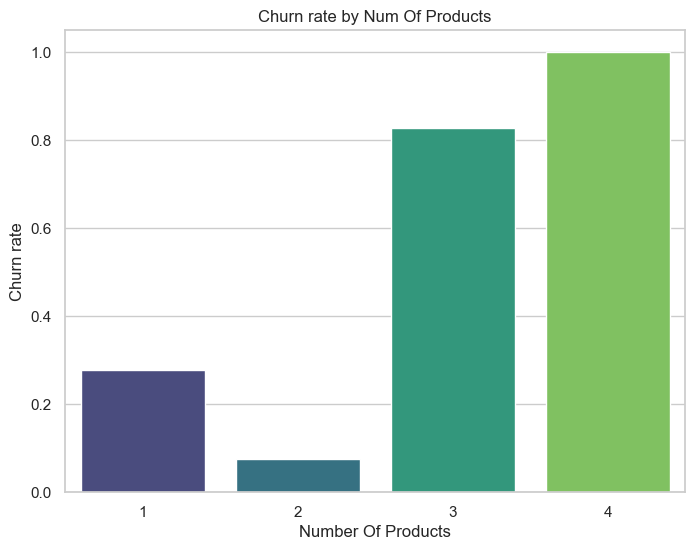

In [75]:
# Set the style
sns.set(style="whitegrid")

# churn rate
churn_rate = df.groupby('NumOfProducts')['Exited'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data = churn_rate, x= 'NumOfProducts', y ='Exited', palette = 'viridis')

# Add labels and title
plt.title("Churn rate by Num Of Products")
plt.xlabel("Number Of Products")
plt.ylabel("Churn rate")

# Show the plot
plt.show()

**3.4 Customer Behavior Analysis**:
  - Churn rate for active vs. inactive members.
  - Churn rate based on credit card ownership.
  - Tenure vs. churn rate.

## 4. **Feature Engineering**
- Convert categorical variables (`Geography`, `Gender`) into numerical format.
- Create new features such as:
  - **Age Groups**: Categorize customers into age brackets.
  - **Balance-to-Salary Ratio**: `Balance / EstimatedSalary`.
  - **Risk Score**: Combine credit score and number of products.
  - **Geography-based risk**: Create dummy variables for `Geography`.


## 5. **Data Preprocessing for Modeling**
- Encode categorical variables.
- Scale numerical features to standardize data.
- Split data into training and test sets.

## 6. **Building a Predictive Model**
- Train different models to predict churn:
  - Logistic Regression for interpretability.
  - Decision Tree or Random Forest for feature importance.
  - XGBoost for better accuracy.
- Evaluate model performance using:
  - Accuracy, Precision, Recall, F1-score, and ROC-AUC.

## 7. **Insights & Business Recommendations**
- Identify the most important factors influencing churn.
- Explain findings in a business-friendly manner:
  - **Who is more likely to churn?** (e.g., younger customers, inactive members, customers with multiple products, etc.)
  - **What actions can the company take?** (e.g., personalized offers, retention strategies for high-risk groups)
- Suggest strategies for improving customer retention and reducing churn.